In [86]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import rendering
from tqdm import tqdm
import trimesh

In [93]:
rendering.set_font(size=16)

In [68]:
folder = 'E:/stlmodels/'
extension = '.bin'

files = os.scandir(folder)
files = [f for f in files if f.name.endswith(extension)]

In [71]:
# Read stats from every mesh
num_vertices = []
num_faces = []

if len(files) == 0:
    extension = '.stl'
    files = os.scandir(folder)
    files = [f for f in files if f.name.endswith(extension)]
       
    for f in tqdm(files):
        mesh = trimesh.load(f.path)
        num_vertices.append(mesh.vertices.shape[0])
        num_faces.append(mesh.faces.shape[0])
else:
    for f in tqdm(files):
        # Open binary file
        file = open(f.path, 'rb')
        num_comps = int.from_bytes(file.read(8), byteorder='little')
        num_v = int.from_bytes(file.read(8), byteorder='little')
        file.read(16 * 4 * num_v)
        num_f = int.from_bytes(file.read(8), byteorder='little')
    
        num_vertices.append(num_v)
        num_faces.append(num_f)

100%|██████████| 1052/1052 [07:45<00:00,  2.26it/s]


C:\Users\AlfonsoLópezRuiz\AppData\Local\Temp\ipykernel_2856\2252404309.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


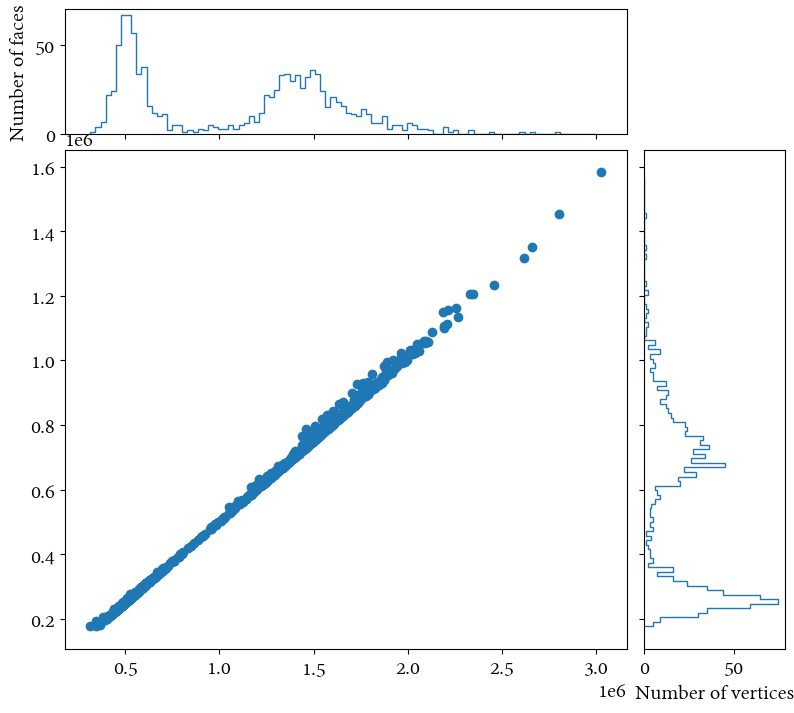

In [99]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    x_max, x_min = np.max(x), np.min(x)
    x_bins = np.arange(x_min, x_max, (x_max - x_min) / 100)
    ax_histx.hist(x, histtype='step', bins=x_bins)
    
    y_max, y_min = np.max(y), np.min(y)
    y_bins = np.arange(y_min, y_max, (y_max - y_min) / 100)
    ax_histy.hist(y, orientation='horizontal', histtype='step', bins=y_bins)


fig = plt.figure(figsize=(9, 8))
# gridspec
gs = fig.add_gridspec(2, 2, width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# axes
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals
scatter_hist(num_vertices, num_faces, ax, ax_histx, ax_histy)
# axes labels
ax_histx.set_ylabel('Number of faces')
ax_histy.set_xlabel('Number of vertices')
# save back into disk
plt.tight_layout()
plt.savefig('results/num_vertices_faces.png', dpi=500)
plt.show()